# Checking the difference in the prediction, number of times one experiment over and under predicts

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet import gluon

In [2]:
from src.RQ1_forecast import *

In [3]:
num_samples = 1

In [4]:
data_address1 = '/home/dev/deepts/experiments/lstm/electricity/1B'

# metric section

In [5]:
# loop through all the runs in the results folder and read the metric dataframe
metrics_list1 = read_csv_result('metrics.csv', data_address1)

124it [00:00, 33979.73it/s]
100%|##########| 100/100 [00:00<00:00, 115.94it/s]


In [6]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,94.513896,200.350739,235.0,9.791667,8.031874,1.039352,1.994004,0.701880,NaN,41.574097,352.000097,0.875000,200.350745,0.875000,48.701393,0.875000
1,1,1.0,361.657308,435.971313,2499.0,104.125000,9.577165,1.896748,0.178999,0.163300,NaN,75.869931,763.267819,0.958333,435.971298,0.958333,108.674777,0.958333
2,2,2.0,3.414377,41.672623,190.0,7.916667,8.673073,0.200201,0.224556,0.198694,NaN,8.008046,75.010716,1.000000,41.672620,1.000000,8.334524,1.000000
3,3,3.0,4573.447917,1517.516968,10468.0,436.166667,48.398763,1.306436,0.151792,0.139845,NaN,52.257434,2625.017957,0.958333,1517.517029,0.958333,410.016101,0.958333
4,4,4.0,888.982015,641.639404,4087.0,170.291667,25.383302,1.053251,0.172629,0.154806,NaN,42.130020,1154.950955,1.000000,641.639420,1.000000,128.327884,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,2242,316.0,1971.538086,858.938293,6671.0,277.958333,30.914619,1.157675,0.338459,0.243409,NaN,46.307017,1380.209349,0.708333,858.938286,0.708333,337.667223,0.708333
2243,2243,317.0,496.342855,375.376251,1058.0,44.083333,31.192686,0.501421,0.358751,0.321890,NaN,20.056851,347.741499,0.666667,375.376244,0.666667,403.010988,0.666667
2244,2244,318.0,286224.458333,9628.824219,50192.0,2091.333333,267.793565,1.498173,0.224063,0.187487,NaN,59.926908,15944.887769,0.875000,9628.824585,0.875000,3312.761401,0.875000
2245,2245,319.0,20435.817708,3021.743652,10581.0,440.875000,169.860660,0.741231,0.441129,0.340329,NaN,29.649241,3430.359143,0.541667,3021.743713,0.541667,2613.128284,0.541667


In [7]:
def sort_metric_df(my_metrics_df):
    my_metrics_df.sort_values(by=['item_id', 'Unnamed: 0'], inplace=True)
    my_metrics_df.reset_index(drop=True, inplace=True)
    return my_metrics_df

In [8]:
def sort_metric_list(my_metric_list):
    for my_metric_df in my_metric_list:
        my_metric_df = sort_metric_df(my_metric_df)

In [9]:
sort_metric_list(metrics_list1)


In [10]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,94.513896,200.350739,235.0,9.791667,8.031874,1.039352,1.994004,0.701880,NaN,41.574097,352.000097,0.875000,200.350745,0.875000,48.701393,0.875000
1,321,0.0,136.810689,245.424713,264.0,11.000000,8.026991,1.273956,2.483149,0.799616,NaN,50.958220,359.257740,0.833333,245.424715,0.833333,131.591690,0.833333
2,642,0.0,132.754517,178.821274,284.0,11.833333,8.025109,0.928447,1.154332,0.569100,NaN,37.137868,238.772603,0.875000,178.821275,0.875000,118.869946,0.875000
3,963,0.0,77.822601,189.714386,189.0,7.875000,8.024132,0.985124,1.697398,0.824766,NaN,39.404965,282.944193,0.916667,189.714388,0.916667,96.484583,0.916667
4,1284,0.0,13.344767,67.444717,166.0,6.916667,8.019890,0.350403,0.864250,0.479348,NaN,14.016134,85.519453,0.666667,67.444714,0.666667,49.369975,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,962,320.0,364082.791667,14340.206055,74254.0,3093.916667,287.494114,2.078333,0.195850,0.177979,NaN,83.133332,25812.371777,1.000000,14340.206543,1.000000,2868.041309,1.000000
2243,1283,320.0,164365.812500,9092.375000,78719.0,3279.958333,287.257349,1.318849,0.123204,0.114550,NaN,52.753945,16366.275439,1.000000,9092.375244,1.000000,1818.475049,1.000000
2244,1604,320.0,305306.666667,12719.632812,74298.0,3095.750000,287.146950,1.845692,0.179840,0.163091,NaN,73.827658,22895.337744,1.000000,12719.632080,1.000000,2543.926416,1.000000
2245,1925,320.0,295504.666667,12854.931641,68217.0,2842.375000,287.030085,1.866084,0.190868,0.173618,NaN,74.643353,23138.877393,1.000000,12854.931885,1.000000,2570.986377,1.000000


# Forecast section

In [11]:
# read the forecast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1, n_files=100)
# forcast_list2 = read_csv_result('forecasts.csv', data_address2, n_files=100)

124it [00:00, 30340.32it/s]
100%|###########| 100/100 [00:02<00:00, 34.85it/s]


In [12]:
len(forcast_list1)

100

In [13]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1, num_samples=num_samples, num_time_series=321)
# sorted_forcast_list2 = get_sorted_csv(forcast_list2)

In [27]:
sorted_forcast_list1[0].head(169)

,fold_num,series_number,timestamp,target,sample0,train_series_number,mean,std,normal_std
0,1,0,2014-05-26 20:00:00,9.0,15.679022,0,15.679022,NaN,NaN
1,1,0,2014-05-26 21:00:00,10.0,15.251570,0,15.251570,NaN,NaN
2,1,0,2014-05-26 22:00:00,22.0,18.060091,0,18.060091,NaN,NaN
3,1,0,2014-05-26 23:00:00,20.0,19.962097,0,19.962097,NaN,NaN
4,1,0,2014-05-27 00:00:00,13.0,18.781527,0,18.781527,NaN,NaN
...,...,...,...,...,...,...,...,...,...
164,1,1926,2014-06-02 16:00:00,6.0,8.436605,0,8.436605,NaN,NaN
165,1,1926,2014-06-02 17:00:00,10.0,8.615972,0,8.615972,NaN,NaN
166,1,1926,2014-06-02 18:00:00,9.0,8.824783,0,8.824783,NaN,NaN
167,1,1926,2014-06-02 19:00:00,9.0,7.467166,0,7.467166,NaN,NaN


In [15]:
target_forcast_series = get_forcast_target(forcast_list1)

In [16]:
# this dataframe is just one time series
ts_number = 0
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_number)

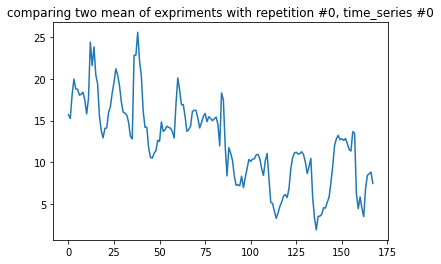

In [17]:
# plot mean of only one time series
rep_no = 0
plt.title(f'comparing two mean of expriments with repetition #{rep_no}, time_series #{ts_number}')
ts_list1[rep_no]['mean'].plot()
# ts_list2[rep_no]['mean'].plot()

## We want to compare the number of time points on experiment underpredict. 
Question is are experiments with worst MAPE, underpredict most of the time?

In [37]:
# question: is the worse one always underpredict?
# we need to use compare means, but I need to change the function
# experiment A
expA_worst_compare = (sorted_forcast_list1[65]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_best_compare = (sorted_forcast_list1[88]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_highest_compare = (sorted_forcast_list1[0]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_lowest_compare = (sorted_forcast_list1[65]['mean'] < sorted_forcast_list1[0]['target']).value_counts()

# # experiment B
# expB_worst_compare = (sorted_forcast_list2[63]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_best_compare = (sorted_forcast_list2[68]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_highest_compare = (sorted_forcast_list2[8]['mean'] < sorted_forcast_list2[0]['target']).value_counts()

In [38]:
# outputs the proportion of true experiences over all the experiences
def compare_two_series(seriesTrue, seriesFalse):
    return seriesTrue/(seriesTrue + seriesFalse)

underpred_A_best = compare_two_series(expA_best_compare[True], expA_best_compare[False])
underpred_A_worst = compare_two_series(expA_worst_compare[True], expA_worst_compare[False])
underpred_A_highest = compare_two_series(expA_highest_compare[True], expA_highest_compare[False])
underpred_A_lowest = compare_two_series(expA_lowest_compare[True], expA_lowest_compare[False])


print(f'percentage of underprediction of worst repetition for experiment A = {underpred_A_worst}')
print(f'percentage of underprediction of best repetition for experiment A = {underpred_A_best}')
print(f'percentage of underprediction of highest repetition for experiment A = {underpred_A_highest}')
print(f'percentage of underprediction of lowest repetition for experiment A = {underpred_A_lowest}')




percentage of underprediction of worst repetition for experiment A = 0.9543836226079216
percentage of underprediction of best repetition for experiment A = 0.5907691737130989
percentage of underprediction of highest repetition for experiment A = 0.09151090342679127
percentage of underprediction of lowest repetition for experiment A = 0.9543836226079216


In [20]:
# find the one with the highest prediction
get_highest_prediction_id(sorted_forcast_list1, high_flag=False), get_highest_prediction_id(sorted_forcast_list1, high_flag=True)

(65, 0)

In [21]:
# find max difference between each experiments with itself and also combined
# combined_forecast_list = sorted_forcast_list1 + sorted_forcast_list2
# combined_max_tuple, _ = get_max_difference_pair(combined_forecast_list)
expA_max_tuple, _ = get_max_difference_pair(sorted_forcast_list1)
# expB_max_tuple, _ = get_max_difference_pair(sorted_forcast_list2)

In [22]:
print(f'the most different tuples of experiment A is: {expA_max_tuple}')
# print(f'the most different tuples of experiment B is: {expB_max_tuple}')
# print(f'the most different tuples of Combined experiments is: {combined_max_tuple}')

the most different tuples of experiment A is: (0, 64)


(10500.0, 10650.0)

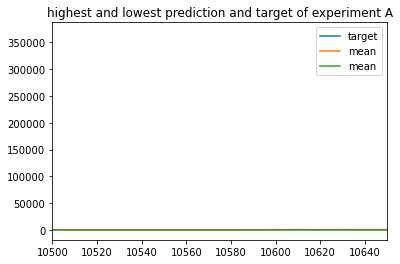

In [23]:
plt.title('highest and lowest prediction and target of experiment A')
sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[40]['mean'].plot(legend=True)
sorted_forcast_list1[17]['mean'].plot(legend=True)
plt.xlim([10500,10650])
# plt.ylim([0.04,0.24])

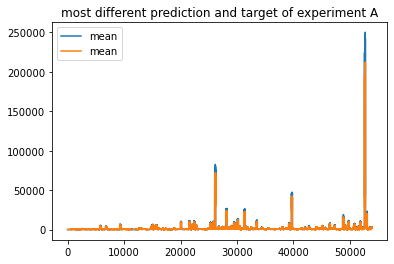

In [24]:
plt.title('most different prediction and target of experiment A')
# sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[95]['mean'].plot(legend=True)
sorted_forcast_list1[67]['mean'].plot(legend=True)
# plt.xlim([10500,10650])
# plt.ylim([0.04,0.24])

## take the average of experiment A and B and plot them
the reults show that after running 100 times, the average of results are converging.

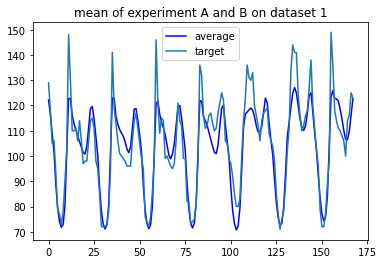

In [34]:
ts_no = 1

# calculate the mean of all means for computer A
ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)


means_A = np.zeros((len(ts_list1) , ts_list1[0]['mean'].shape[0]))
# means_B = np.zeros((len(ts_list2) , ts_list2[0]['mean'].shape[0]))


for idx, ts_df1 in enumerate(ts_list1):
    means_A[idx] = ts_df1['mean'].to_numpy()
# for idx, ts_df2 in enumerate(ts_list2):
#     means_B[idx] = ts_df2['mean'].to_numpy()

mean_means_A = means_A.mean(axis=0)
# mean_means_B = means_B.mean(axis=0)

plt.title(f'mean of experiment A and B on dataset {ts_no}')
plt.plot(mean_means_A, color='blue', label='average')
# plt.plot(mean_means_B, color='red')
plt.plot(ts_list1[0]['target'].to_numpy(), label='target')

plt.legend()
# mean1 = ts_list1[0]['mean'].to_numpy()
# mean1.shape

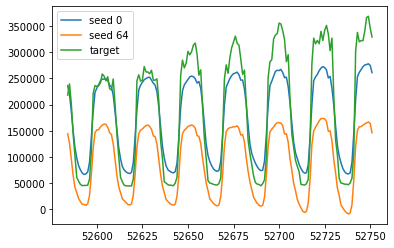

In [32]:
# this dataframe is just one time series
ts_number = 313
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_number)

# plot mean of only one time series
rep_no1 = 0
rep_no2 = 64
# plt.title(f'comparing two mean of expriments with repetition #{rep_no}, time_series #{ts_number}')
ts_list1[rep_no1]['mean'].plot(label ='seed 0')
ts_list1[rep_no2]['mean'].plot(label = 'seed 64')
ts_list1[rep_no2]['target'].plot(label = 'target')
plt.legend()

# ts_list2[rep_no]['mean'].plot()